<a href="https://colab.research.google.com/github/Xalsare/oibsip_taskno/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the Dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

#Data Collection and Preprocessing

In [ ]:
car_data = pd.read_csv('car data.csv')

In [ ]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [ ]:
car_data.shape

(301, 9)

In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
car_data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [ ]:
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


#Data Visualization

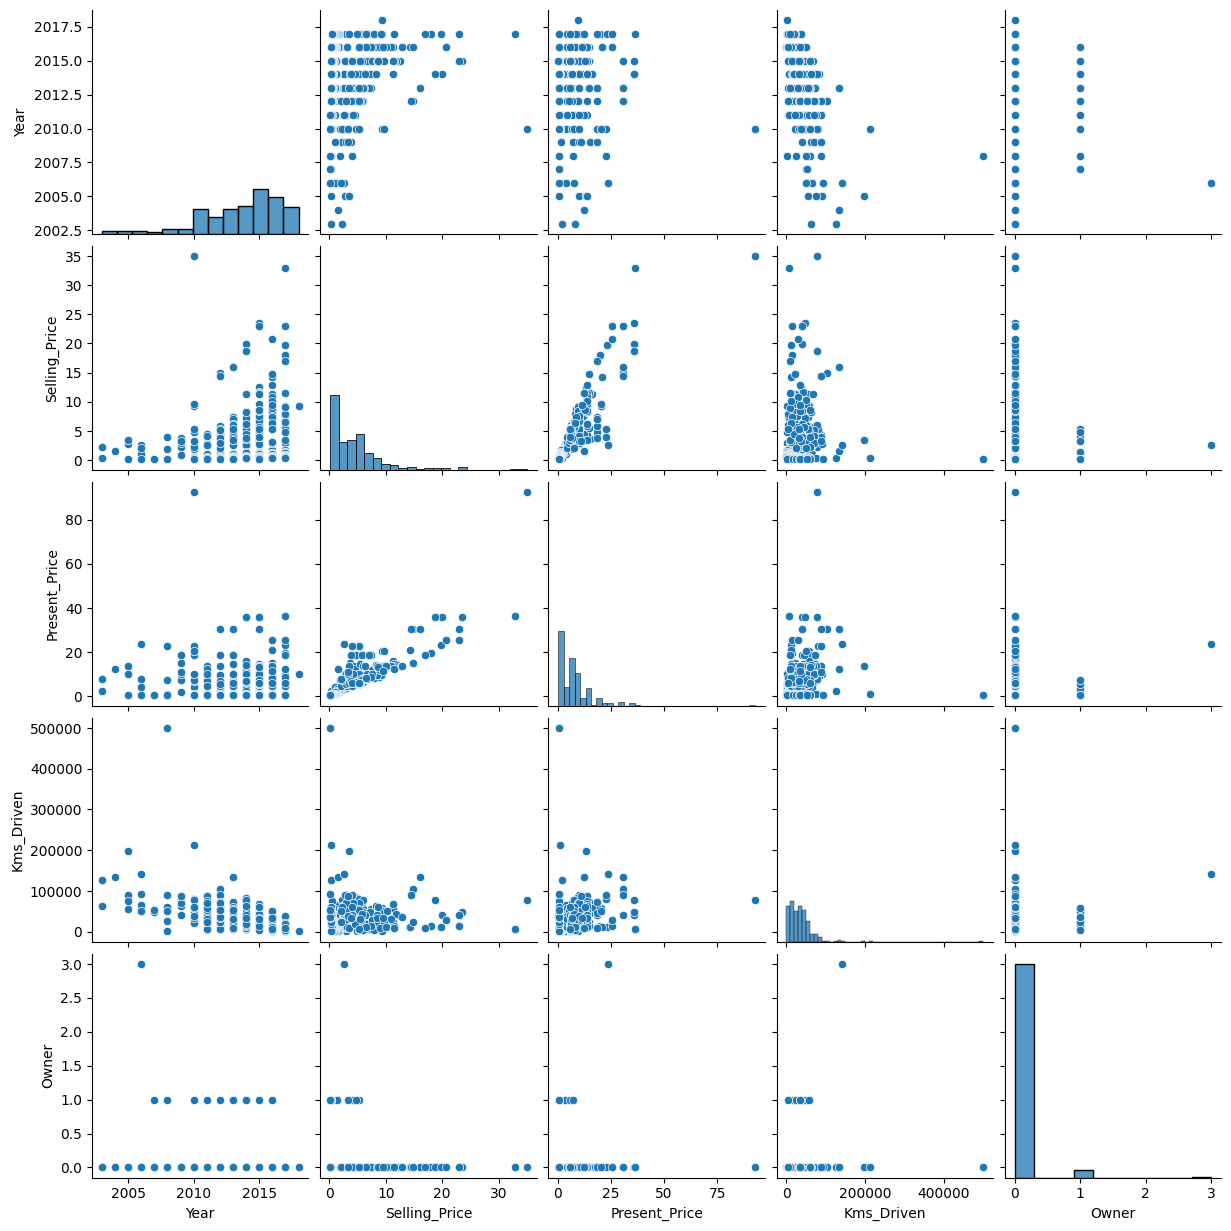

In [ ]:
sns.pairplot(car_data)

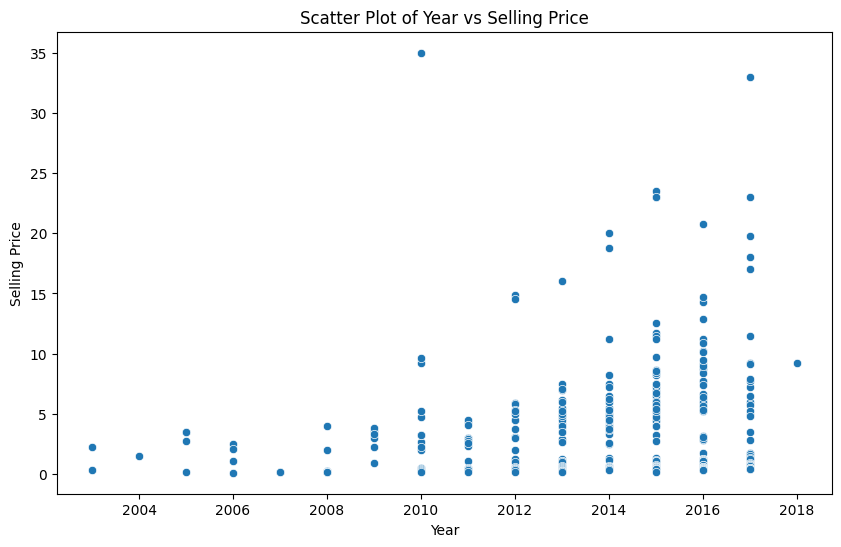

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Selling_Price', data=car_data)
plt.title('Scatter Plot of Year vs Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

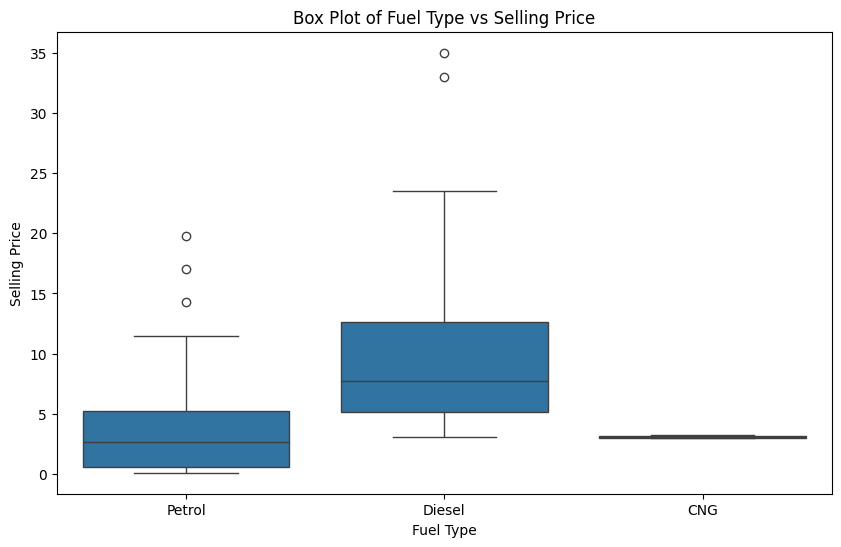

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=car_data)
plt.title('Box Plot of Fuel Type vs Selling Price')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.show()

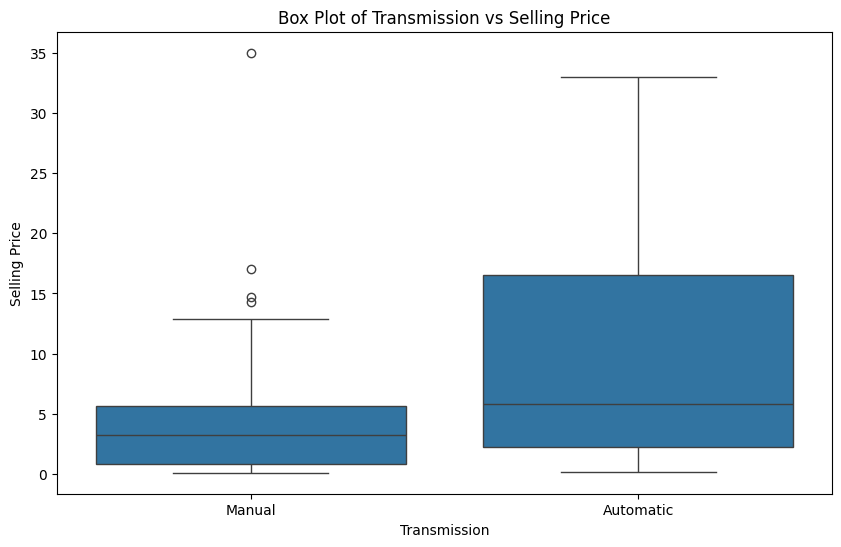

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Selling_Price', data=car_data)
plt.title('Box Plot of Transmission vs Selling Price')
plt.xlabel('Transmission')
plt.ylabel('Selling Price')
plt.show()

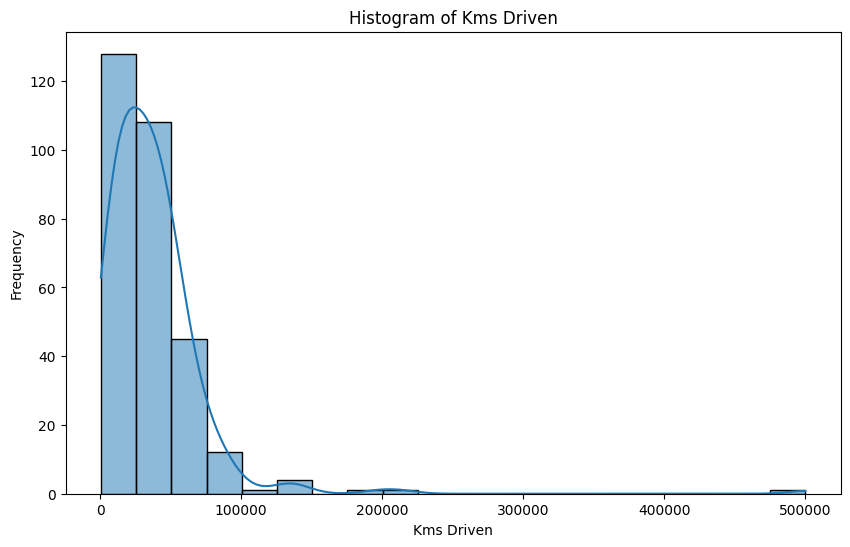

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(car_data['Kms_Driven'], bins=20, kde=True)
plt.title('Histogram of Kms Driven')
plt.xlabel('Kms Driven')
plt.ylabel('Frequency')
plt.show()


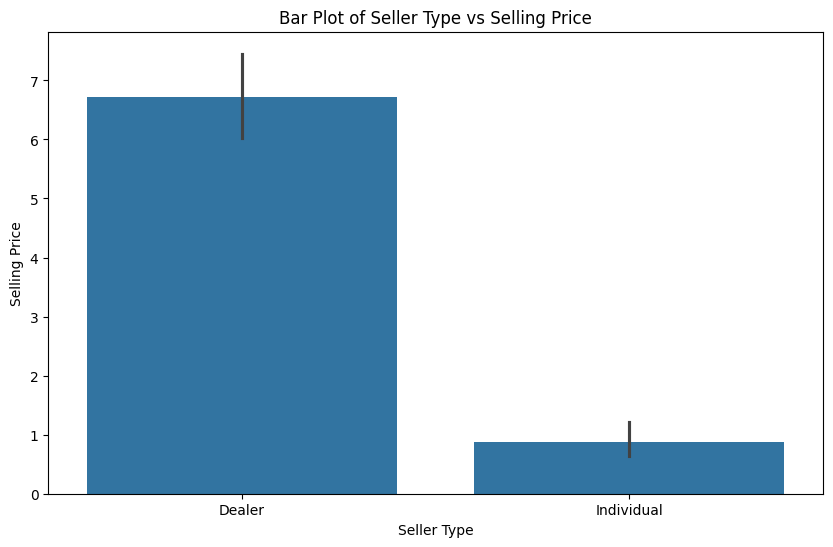

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Seller_Type', y='Selling_Price', data=car_data)
plt.title('Bar Plot of Seller Type vs Selling Price')
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.show()

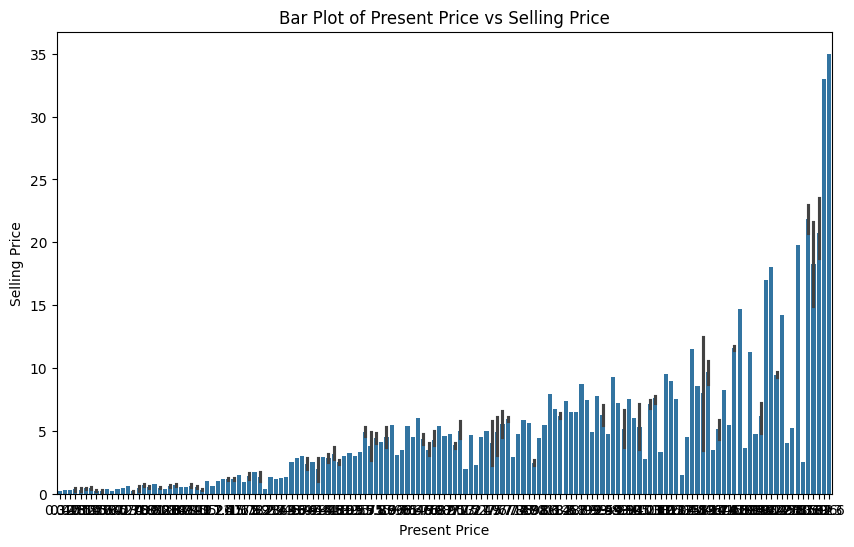

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Present_Price', y='Selling_Price', data=car_data)
plt.title('Bar Plot of Present Price vs Selling Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.show()

<ipython-input-20-a53a33162f91>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(car_data.corr(),cmap = "BuGn",annot = True)


<Axes: >

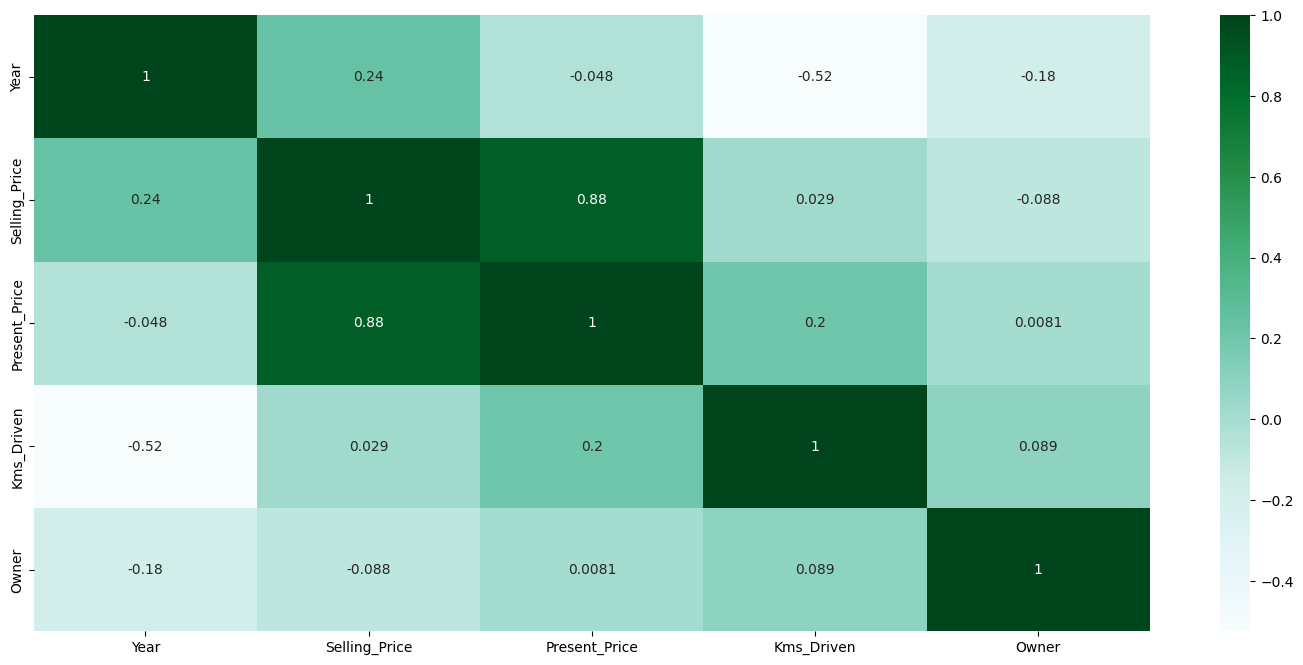

In [ ]:
plt.figure(figsize =(18,8))
sns.heatmap(car_data.corr(),cmap = "BuGn",annot = True)

# Encoding the Categorical Data


In [ ]:
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Splitting the data into Training and test data

In [ ]:
X = car_data.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_data['Selling_Price']

In [ ]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [ ]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


#Splitting training and test data

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1,random_state=2)

#Model Training

#Linear Regression

In [ ]:
lin_reg_model = LinearRegression()

In [ ]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

#ModelEvaluation

In [ ]:
training_data_prediction = lin_reg_model.predict(X_train)

In [ ]:
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error :",error_score)

R squared Error : 0.8799451660493711


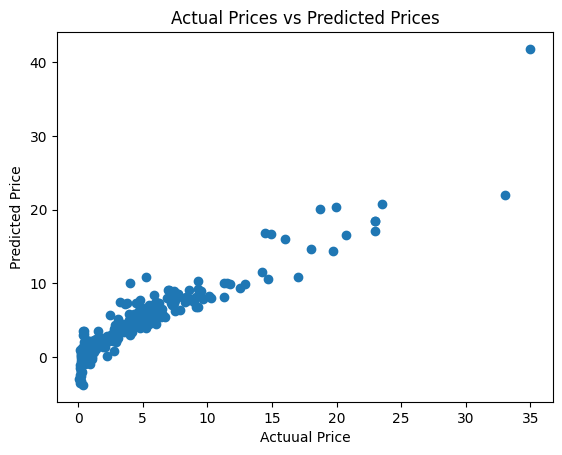

In [ ]:






plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actuual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
test_data_prediction = lin_reg_model.predict(X_test)

In [ ]:
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared Error :",error_score)

R squared Error : 0.8365766715027051


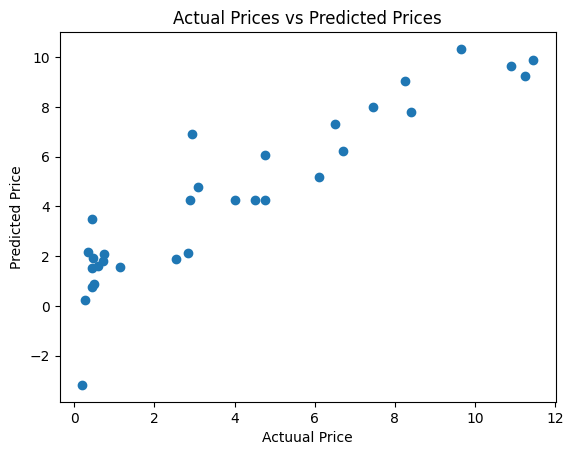

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actuual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

#Lasso regression

In [ ]:
lass_reg_model = Lasso()

In [ ]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [ ]:
training_data_prediction = lass_reg_model.predict(X_train)

#Model Evaluation

In [ ]:
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error :",error_score)

R squared Error : 0.8427856123435794


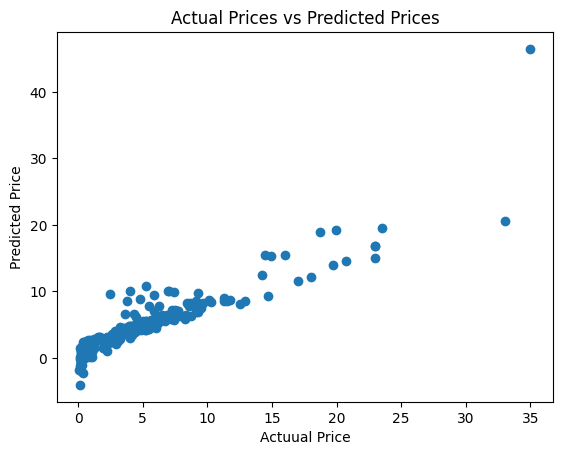

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actuual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
test_data_prediction = lass_reg_model.predict(X_test)

In [ ]:
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared Error :",error_score)

R squared Error : 0.8709167941173195


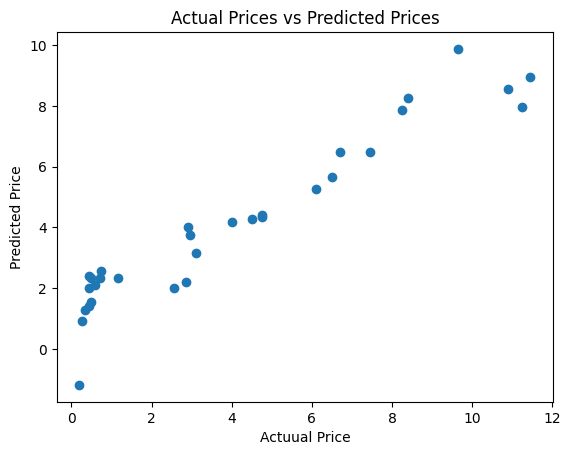

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actuual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

#Decision Tree Regression

In [ ]:
dec_reg_model = DecisionTreeRegressor()

In [ ]:
dec_reg_model.fit(X_train,Y_train)

DecisionTreeRegressor()

In [ ]:
training_data_prediction = dec_reg_model.predict(X_train)

#Model Evaluation

In [ ]:
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error :",error_score)

R squared Error : 1.0


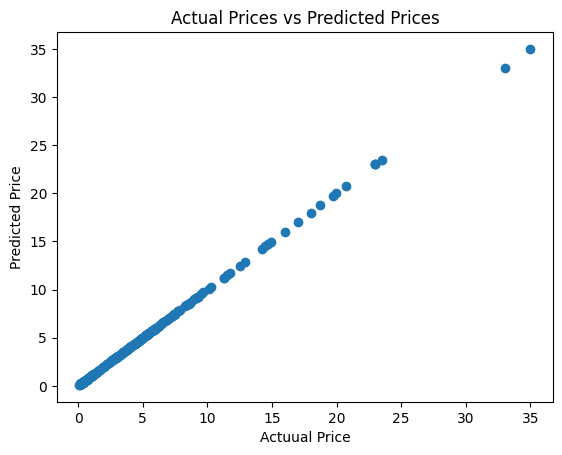

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actuual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
test_data_prediction = dec_reg_model.predict(X_test)

In [ ]:
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared Error :",error_score)

R squared Error : 0.9255629038465162


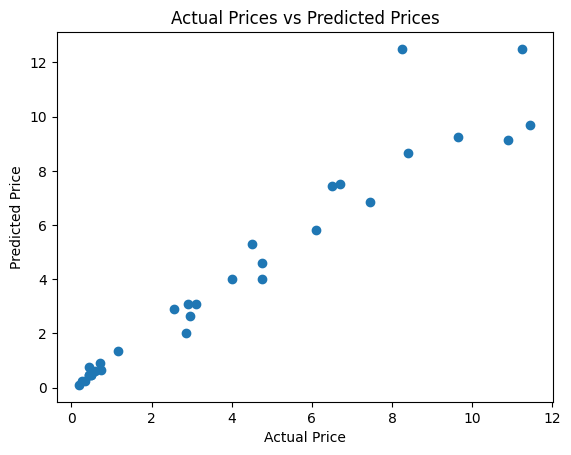

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()